In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

In [2]:
from sklearn.preprocessing import MinMaxScaler

In [3]:
pip install plotly

In [4]:
data = pd.read_csv("/content/drive/MyDrive/Dataset/train-2.csv")
data.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [5]:
data.columns

Index(['Dates', 'Category', 'Descript', 'DayOfWeek', 'PdDistrict',
       'Resolution', 'Address', 'X', 'Y'],
      dtype='object')

In [6]:
data.isnull().sum()

,0
Dates,0
Category,0
Descript,0
DayOfWeek,0
PdDistrict,0
Resolution,0
Address,0
X,0
Y,0


In [7]:
data = data.drop(["Descript","DayOfWeek","PdDistrict","Resolution","Address"],axis=1)
data.head()

,Dates,Category,X,Y
0,2015-05-13 23:53:00,WARRANTS,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,-122.438738,37.771541


In [8]:
f = lambda x:(x["Dates"].split("-"))[0]
data["Dates"] = data.apply(f,axis = 1)
data.head()

,Dates,Category,X,Y
0,2015,WARRANTS,-122.425892,37.774599
1,2015,OTHER OFFENSES,-122.425892,37.774599
2,2015,OTHER OFFENSES,-122.424363,37.800414
3,2015,LARCENY/THEFT,-122.426995,37.800873
4,2015,LARCENY/THEFT,-122.438738,37.771541


In [9]:
data2014 = data[(data.Dates=="2014")]
data2014.head()

,Dates,Category,X,Y
27584,2014,LARCENY/THEFT,-122.435563,37.760801
27585,2014,LARCENY/THEFT,-122.433575,37.800037
27586,2014,VEHICLE THEFT,-122.412777,37.786834
27587,2014,ASSAULT,-122.421702,37.773641
27588,2014,ASSAULT,-122.421702,37.773641


In [10]:
sc = MinMaxScaler()
sc.fit(data2014[["X"]])
data2014["x_scaled"] = sc.transform(data2014[["X"]])

<ipython-input-10-7caca5e0e0fa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2014["x_scaled"] = sc.transform(data2014[["X"]])


In [11]:
data2014.head()

,Dates,Category,X,Y,x_scaled
27584,2014,LARCENY/THEFT,-122.435563,37.760801,0.526134
27585,2014,LARCENY/THEFT,-122.433575,37.800037,0.539528
27586,2014,VEHICLE THEFT,-122.412777,37.786834,0.679676
27587,2014,ASSAULT,-122.421702,37.773641,0.619540
27588,2014,ASSAULT,-122.421702,37.773641,0.619540


In [12]:
sc = MinMaxScaler()
sc.fit(data2014[["Y"]])
data2014["y_scaled"] = sc.transform(data2014[["Y"]])
data2014.head()

<ipython-input-12-70180f9864f3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2014["y_scaled"] = sc.transform(data2014[["Y"]])


,Dates,Category,X,Y,x_scaled,y_scaled
27584,2014,LARCENY/THEFT,-122.435563,37.760801,0.526134,0.471397
27585,2014,LARCENY/THEFT,-122.433575,37.800037,0.539528,0.821894
27586,2014,VEHICLE THEFT,-122.412777,37.786834,0.679676,0.703952
27587,2014,ASSAULT,-122.421702,37.773641,0.619540,0.586098
27588,2014,ASSAULT,-122.421702,37.773641,0.619540,0.586098


In [13]:
k_range = range(1,15)
list = []
for k in k_range:
  model = KMeans(n_clusters=k)
  model.fit(data2014[["x_scaled","y_scaled"]])
  list.append(model.inertia_)

In [14]:
from matplotlib import pyplot as plt

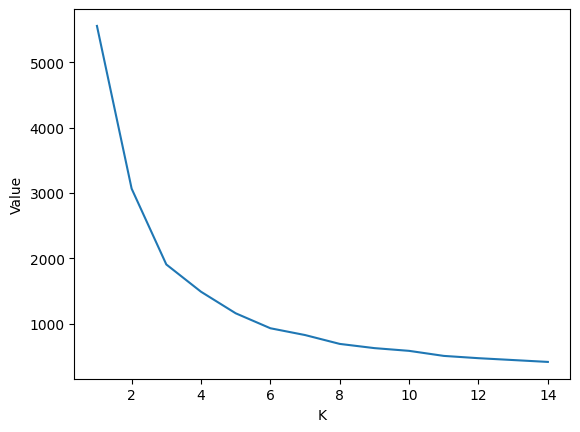

In [15]:
plt.xlabel("K")
plt.ylabel("Value")
plt.plot(k_range,list)
plt.show()

In [16]:
mode = KMeans(n_clusters=5)
y_pred = mode.fit_predict(data2014[["x_scaled","y_scaled"]])
y_pred

array([4, 0, 0, ..., 0, 2, 0], dtype=int32)

In [17]:
 data2014["cluster"] = y_pred
 data2014.head()

<ipython-input-17-4899693c2e59>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2014["cluster"] = y_pred


,Dates,Category,X,Y,x_scaled,y_scaled,cluster
27584,2014,LARCENY/THEFT,-122.435563,37.760801,0.526134,0.471397,4
27585,2014,LARCENY/THEFT,-122.433575,37.800037,0.539528,0.821894,0
27586,2014,VEHICLE THEFT,-122.412777,37.786834,0.679676,0.703952,0
27587,2014,ASSAULT,-122.421702,37.773641,0.619540,0.586098,4
27588,2014,ASSAULT,-122.421702,37.773641,0.619540,0.586098,4


In [18]:
import plotly.express as px

In [19]:
figure = px.scatter_mapbox(data2014,lat="Y",lon="X",
                           center=dict(lat = 37.77,lon=-122.42),
                           zoom = 12,
                           mapbox_style="open-street-map",
                           color="cluster",
                           title="Crime Map",
                           width=1100,
                           height=700,
                           hover_data=["cluster","Category","Y","X"]
                          )


In [20]:
figure.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import plotly
plotly.offline.plot(figure,filename="mapes.html",auto_open=True)
